> There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given. So we will be making clusters of cutomers using two techniques:



1.   K-Means Clustering
2.   Hierarchical Clustering




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print('Data :',data.head(5))
print('Data shape :',data.shape)
print(data.columns)

Data :    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Data shape : (200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
data = data.drop(['CustomerID'],axis=1)

In [4]:
# statistical info
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


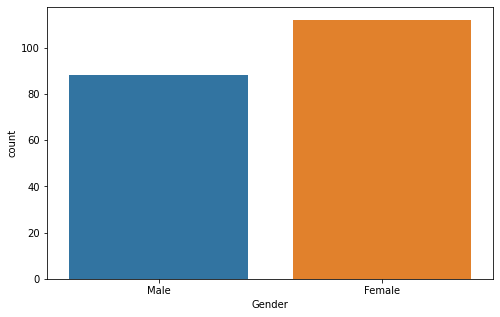

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data['Gender'])
plt.show()

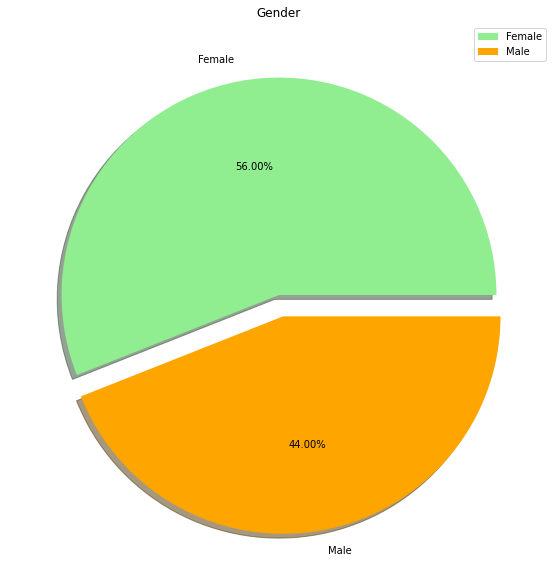

In [7]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(15,10))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


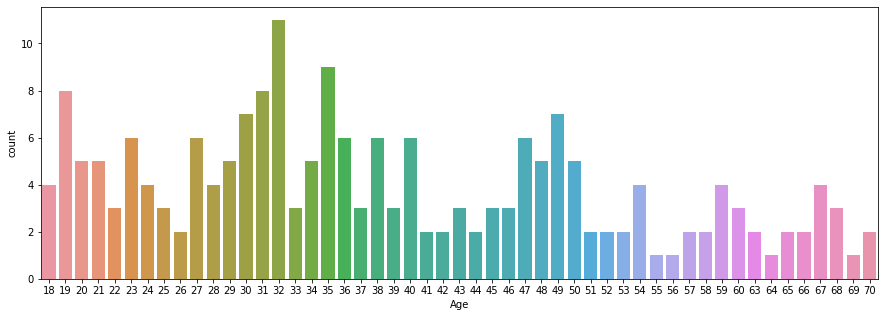

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data['Age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


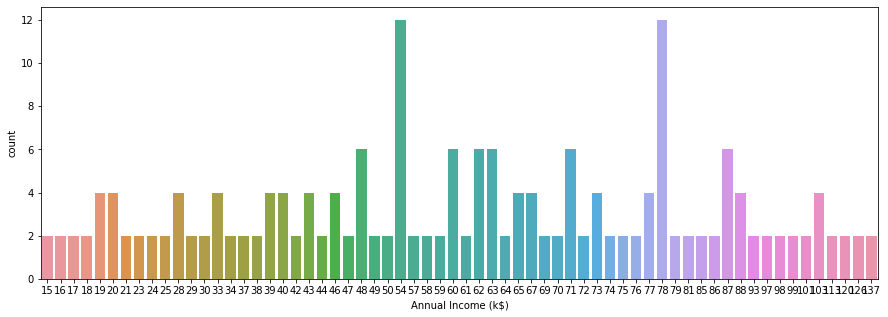

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data['Annual Income (k$)'])
plt.show()

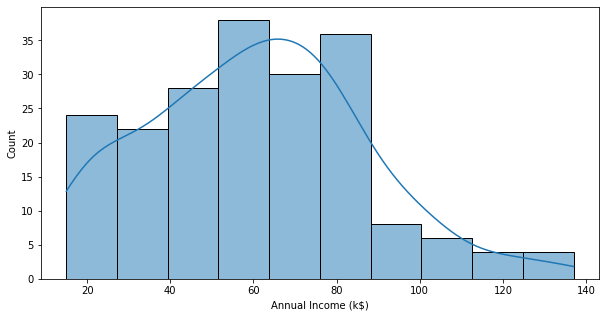

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data['Annual Income (k$)'],kde=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


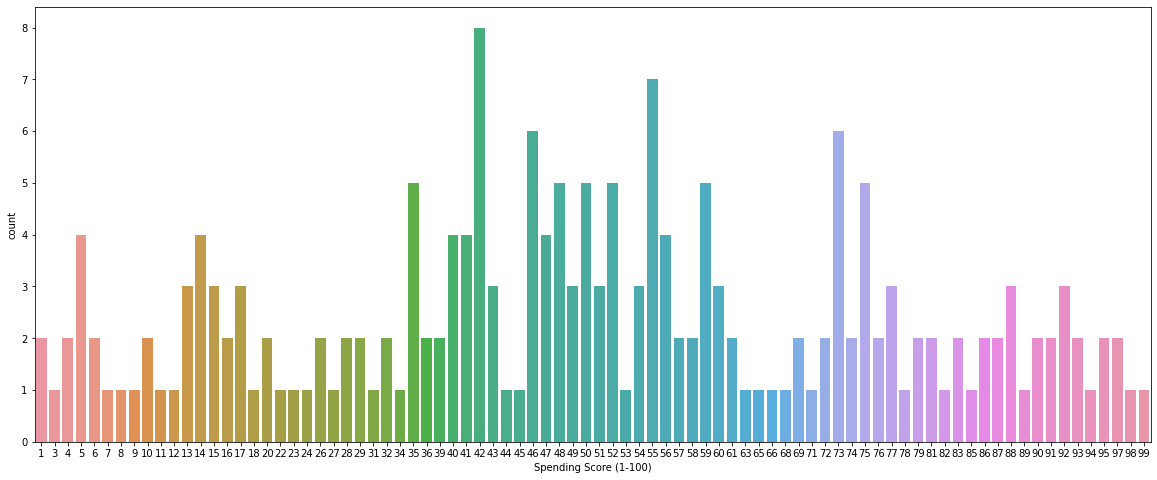

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(data['Spending Score (1-100)'])
plt.show()

<Figure size 720x576 with 0 Axes>

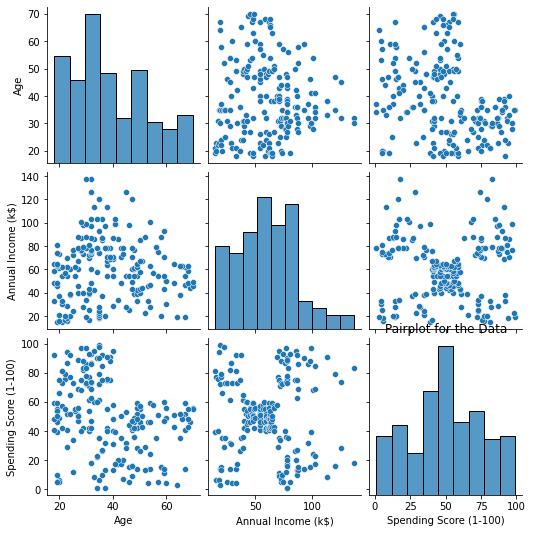

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.title('Pairplot for the Data')
plt.show()

In [13]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})  

In [15]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


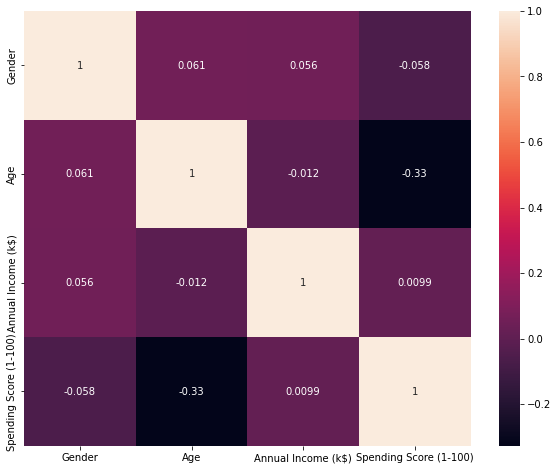

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
X = data

> PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [19]:
X_pca[:3,:]

array([[-31.86994476, -33.00125207],
       [  0.76449405, -56.84290063],
       [-57.40827565, -13.1249607 ]])

In [20]:
# how much info we retained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.892096162464606

> Elbow Method 


> Using elbow method to find the optimal number of clusters

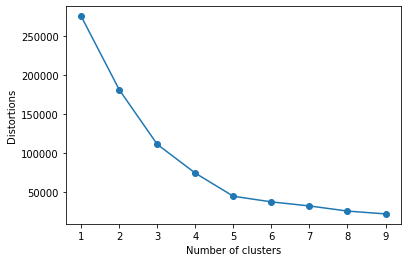

In [21]:
# Kmeans clustering
from sklearn.cluster import KMeans
distortions = []
cluster_range = range(1,10)
# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++',max_iter=500, random_state=42)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')
plt.show()

>K-Means Clustering

In [22]:
from sklearn.cluster import KMeans
KMeansModel = KMeans(n_clusters=5, init='k-means++',max_iter=500, random_state=42)
KMeansModel.fit_transform(X_pca)
print('KMeansModel Train Score is : ' , KMeansModel.score(X_pca))
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)
print('----------------------------------------------------')


KMeansModel Train Score is :  -45092.05171373356
KMeansModel centers are :  [[  4.98536192 -46.67336912]
 [ -4.41026389  -3.10070422]
 [-10.22445521  42.33140596]
 [-44.38675468 -10.05043814]
 [ 41.55103875   1.87087541]]
KMeansModel labels are :  [3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
KMeansModel intertia is :  45092.05171373356
KMeansModel No. of iteration is :  3
----------------------------------------------------


> Show Data 

<function matplotlib.pyplot.show(close=None, block=None)>

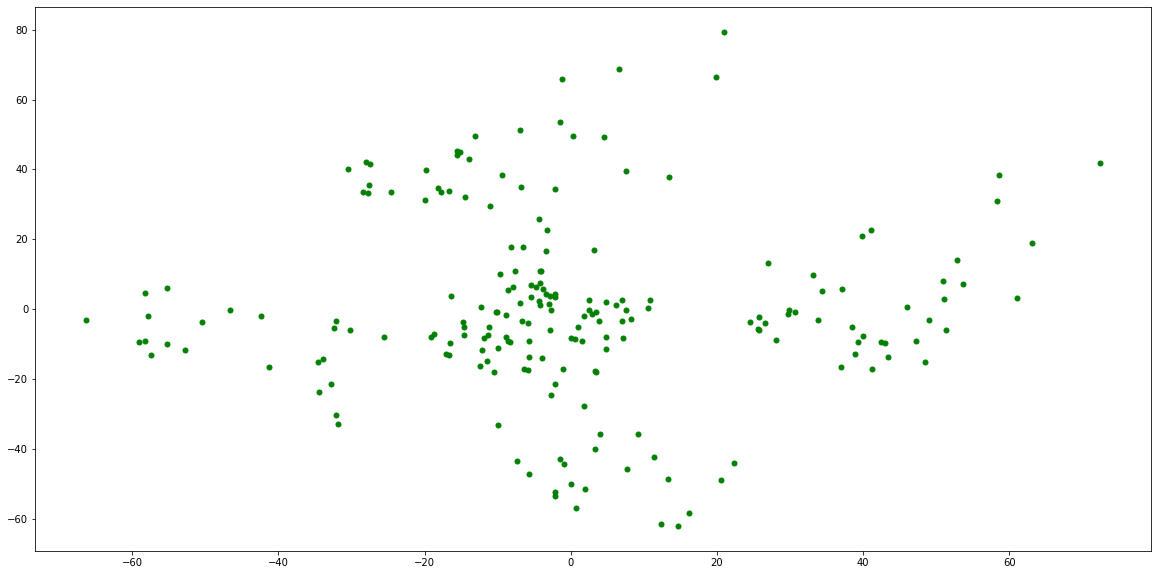

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,1] ,c ='g' , s = 25)
plt.show

In [24]:
#Calculating Prediction
y_pred = KMeansModel.predict(X_pca)
print('Predicted Value for KMeansModel is : ' , y_pred[:10])

Predicted Value for KMeansModel is :  [3 0 3 0 3 0 3 0 3 0]


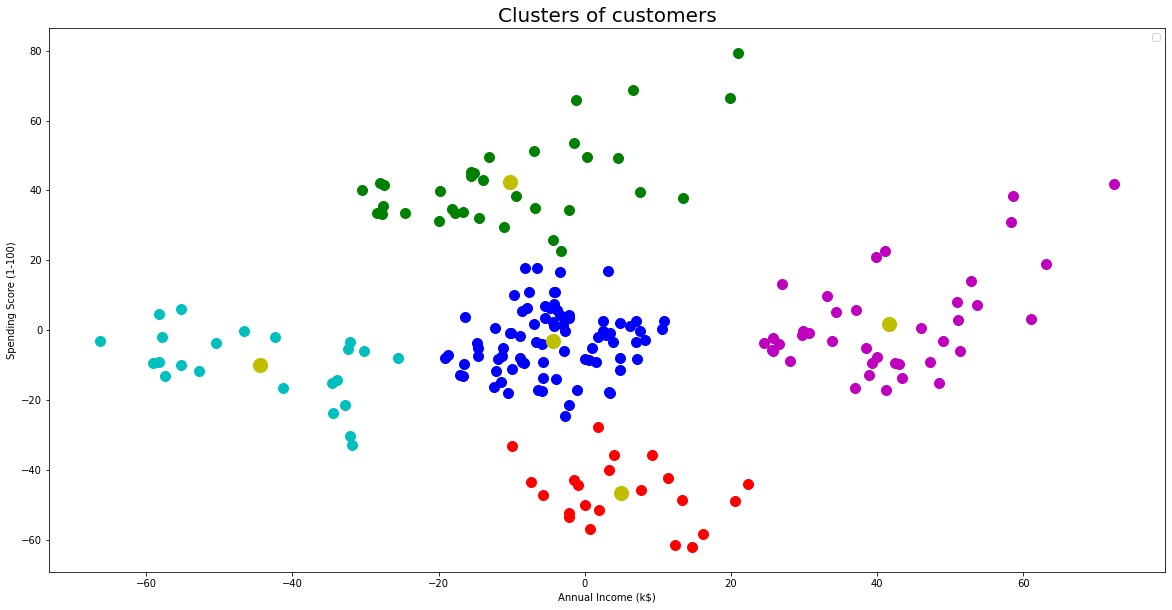

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[y_pred == 0, 0], X_pca[y_pred == 0, 1], s = 100, c = 'r')
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], s = 100, c = 'b')
plt.scatter(X_pca[y_pred == 2, 0], X_pca[y_pred == 2, 1], s = 100, c = 'g')
plt.scatter(X_pca[y_pred == 3, 0], X_pca[y_pred == 3, 1], s = 100, c = 'c')
plt.scatter(X_pca[y_pred == 4, 0], X_pca[y_pred == 4, 1], s = 100, c = 'm')

plt.scatter(KMeansModel.cluster_centers_[:, 0], KMeansModel.cluster_centers_[:, 1], s = 200, c = 'y')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
from collections import Counter
Counter(y_pred)

Counter({3: 23, 0: 22, 1: 82, 4: 39, 2: 34})

> Show Dendrogram to find the optimal number of clusters

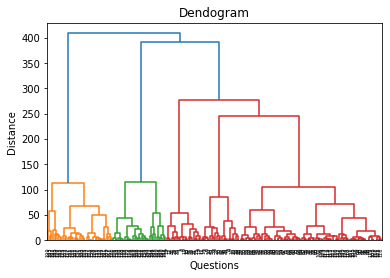

In [27]:
import scipy.cluster.hierarchy as hier
dendogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))

plt.title('Dendogram')
plt.xlabel("Questions")
plt.ylabel("Distance")
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hie = model.fit_predict(X_pca)

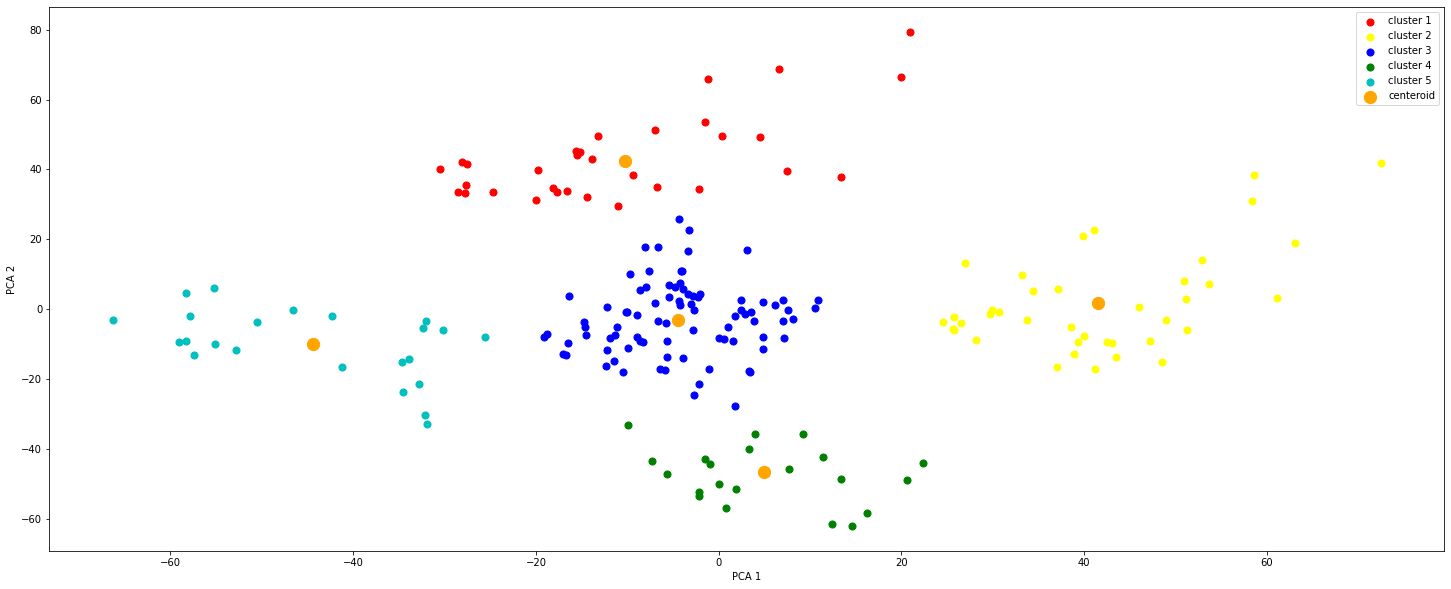

In [29]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(X_pca[y_hie==0, 0], X_pca[y_hie==0, 1], s=50, c='red', label='cluster 1')
plt.scatter(X_pca[y_hie==1, 0], X_pca[y_hie==1, 1], s=50, c='yellow', label='cluster 2')
plt.scatter(X_pca[y_hie==2, 0], X_pca[y_hie==2, 1], s=50, c='b', label='cluster 3')
plt.scatter(X_pca[y_hie==3, 0], X_pca[y_hie==3, 1], s=50, c='g', label='cluster 4')
plt.scatter(X_pca[y_hie==4, 0], X_pca[y_hie==4, 1], s=50, c='c', label='cluster 5')
plt.scatter(KMeansModel.cluster_centers_[:,0], KMeansModel.cluster_centers_[:, 1], s = 150, c = 'orange' , label = 'centeroid')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [30]:
Counter(y_hie)

Counter({4: 23, 3: 21, 2: 85, 1: 39, 0: 32})